In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\agamm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\agamm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\agamm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\agamm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

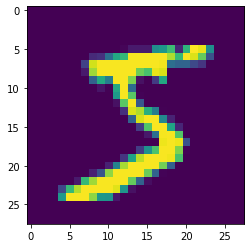

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train[0]

5

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [8]:
# Stacked Auotencoder

In [9]:
28*28

784

In [10]:
784/2

392.0

In [11]:
encoder = Sequential()

encoder.add(Flatten(input_shape=[28, 28]))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
25/784
# 3 percent of all data
784 - 400 - 200 - 100 - 50 - 25 - 50 - 100 - 200 - 400 - 784

-1525

In [13]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))

decoder.add(Reshape([28, 28]))
# compare output to input

In [14]:
autoencoder = Sequential([encoder, decoder])

In [15]:
autoencoder.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.5), metrics=['accuracy'])

In [16]:
autoencoder.fit(X_train,X_train, epochs=1, validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
60000/60000 [==============================] - 21s 342us/sample - loss: 0.2535 - acc: 0.7917 - val_loss: 0.2272 - val_acc: 0.7898


Original


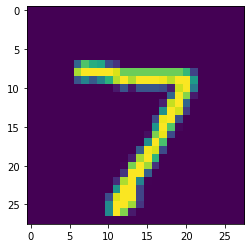

Output


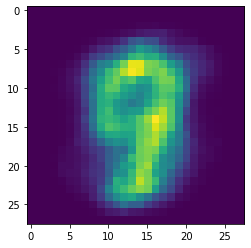

In [17]:
passes_images = autoencoder.predict(X_test[:10])
n = 0
print('Original')
plt.imshow(X_test[n])
plt.show()
print("Output")
plt.imshow(passes_images[n])

In [18]:
# Noise Removal

In [19]:
from tensorflow.keras.layers import GaussianNoise

In [20]:
example = GaussianNoise(0.2)

In [21]:
noisy = example(X_test[:10], training=True)

In [22]:
def add_gaussian_noise(image):
    # image must be scaled in [0, 1]
    with tf.name_scope('Add_gaussian_noise'):
        noise = tf.random_normal(shape=tf.shape(image), mean=0.0, stddev=(50)/(255), dtype=tf.float32)
        noise_img = image + noise
        noise_img = tf.clip_by_value(noise_img, 0.0, 1.0)
    return noise_img

In [23]:
noisy = add_gaussian_noise(X_test[:10])

In [24]:
# plt.imshow(np.real(noisy[1]))

In [25]:
tf.random.set_random_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28, 28]))
encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [26]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))

decoder.add(Reshape([28, 28]))
# compare output to input

In [27]:
noise_remove = Sequential([encoder, decoder])

In [28]:
noise_remove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
noise_remove.fit(X_train, X_train, epochs=1, validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 33s 556us/sample - loss: 0.1670 - acc: 0.8016 - val_loss: 0.1312 - val_acc: 0.8060


In [30]:
noised_images = example(X_test[:15], training=True)

In [31]:
denoised_images = noise_remove.predict(noised_images,steps=2)

In [33]:
# plt.imshow(X_test[1])
# plt.show()

# plt.imshow(noised_images[1])
# plt.show()

# plt.imshow(denoised_images[1])
# plt.show()

In [34]:
no = add_gaussian_noise(X_test[1])

In [35]:
# plt.imshow(np.real(no))

In [36]:
print(tf.__version__)

1.13.1


In [ ]:
!pip uninstall tensorflow